<h1>Analisis Exploratorio de Datos (EDA).</h1>

<h2>1. Listado de Variables y Selección.</h2>

El dataset que utilizaremos esta constituido con un total de 3000 filas x 16 columnas, que muestran por cada paciente(de género: F o M, y Edad) un conjunto de síntomas y actividades que poseen, toda esta informacion se encuentra en el archivo dataset "Lung_Cancer.csv"

<h3>Variables de Entrada.</h3>

Consideraremos para este Trabajo: 2 = **SI**, 1 = **NO**.

- **Gender:** Género del paciente, Actualmente (F: Femenino, M: Masculino), **lo vamos a reconvertir** (1: Femenino, 2: Masculino).
- **Age:** Edad del paciente.
- **Smoking:** Si el paciente es un fumador habitual.
- **Yellow_Fingers:** Si el paciente posee el síntoma de *Dedos Amarillos.*
- **Anxiety:** Si el paciente posee el síntoma de *Ansiedad.*
- **Peer_Pressure:** Si el paciente sufre de *Presión* por fumar o tomar alcohol.
- **Chronic_Disease:** Si el paciente sufre de algun tipo de enfermedad crónica.
- **Fatigue:** Si el paciente experimenta *Fatiga.*
- **Allergy:** Si el paciente sufre de algún tipo de *Alergia.*
- **Wheezing:** Si se oye algún tipo de sonido agudo en la respiración del paciente.
- **Alcohol_Consuming:** Si el paciente es alcoholico.
- **Coughing:** Si el paciente presenta *Tos.*
- **Shortness_Of_Breath:** Si el paciente posee dificultad para respirar.
- **Swallowing_Dificulty:** Si el paciente posee dificultad para tragar.
- **Chest_Pain:** Si el paciente padece de dolor en el pecho.

<h3>Variable de Salida.</h3>

Nuestra variable de salida será **LUNG_CANCER:** El diagnóstico final sobre la presencia de Cáncer de Pulmón, Actualmente (YES, NO), **lo vamos a reconvertir** (1: SI, 2: NO). Con esta variable vamos a predecir si un paciente posee Cáncer de Pulmón o no. 

<h3>Variables que no se Utilizarán.</h3>

(VER) Si hay alguna que no podamos utilizar, por el momento las utilizaremos todas.

In [53]:
# Importamos las dependencias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import sklearn_pandas
from matplotlib import gridspec
import pytz
import random
import os

In [54]:
# Importamos el dataset.
dataset = pd.read_csv('Lung_Cancer.csv',encoding='UTF-8')

dataset.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
918,F,60,2,1,1,1,2,2,1,1,1,1,2,1,2,YES
1578,M,77,1,1,2,2,1,1,2,1,2,1,1,1,2,NO
1968,F,33,1,2,1,1,2,1,1,1,1,1,1,1,1,YES
2829,F,31,2,2,1,1,2,2,1,2,2,2,2,2,1,YES
1302,M,33,2,1,1,1,1,2,2,2,2,1,1,2,2,NO


In [55]:
# Tipo de datos y dimensiones del Dataset.
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [56]:
# Filas x Columnas.
dataset.shape

(3000, 16)

<h2>2. Análisis detallado de un conjunto de variables.</h2>

<h3>a. Comportamiento de la variable de Salida.</h3>

In [57]:
# Reconvertimos el género y el diagnóstico de Cáncer de Pulmón a valores enteros: (1: Masculino, 0: Femenino), (1: Si, 2: No).
data = dataset.copy()
data['GENDER'] = data.GENDER.map({'M' : 1, 'F' : 0})
data.LUNG_CANCER = data.LUNG_CANCER.map({'YES': 1, 'NO': 0})
data.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1479,0,51,1,1,2,2,1,2,1,2,2,1,1,2,2,0
2587,0,68,2,2,1,2,2,1,1,1,2,2,1,2,2,1
59,0,55,1,1,1,2,2,2,1,2,2,2,1,1,2,0
2526,1,57,2,2,1,1,1,2,1,1,1,2,2,2,2,1
1964,0,45,1,1,2,2,1,2,2,1,2,2,2,1,1,1


<Axes: ylabel='count'>

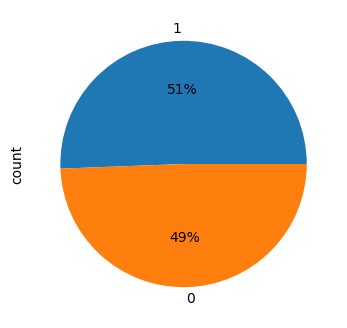

In [58]:
# Graficamos la distribución de la variable de salida.
data.LUNG_CANCER.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4))

Podemos observar que el dataset se encuentra balanceado en cuanto a la cantidad de pacientes que poseen cancer de pulmón. Vemos que el 51% de los pacientes cuentan con un diagnóstico positivo de cáncer de pulmon, mientras que el otro 49% no, ésta es una relación muy pareja, 50/50.

<h2>b. Análisis individual de cada variable de entrada.</h2>

**Variable: Gender.** 

Nuestro conjunto de datos esta compuesto a grandes rasgos por un 50% de Hombres (1514) y un 50% de Mujeres (1486).

In [59]:
# Graficamos la distribución de la variable de entrada "Gender".
px.histogram(dataset, x='GENDER', title = 'Distribución')

In [60]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# 1: Masculino, 2: Femenino.
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='GENDER', color='LUNG_CANCER', barmode='group')

Por lo que podemos observar, el género del paciente no es una variable que tiene mucho peso en nuestro dataset, es decir, que una persona sea mujer u hombre, no es es tan imprescindible para nuestro análisis, vemos que los resultados son muy parejos, de la cantidad de hombres, la mitad poseen un diagnóstico positivo y la mitad no, mismo caso en mujeres.

**Variable: Age.**

In [61]:
# Graficamos la distribución de la variable de entrada "Age".
px.histogram(dataset, x='AGE', title = 'Distribución')

Por lo que podemos ver a partir del histograma anterior, tenemos un promedio de 100 pacientes por cada edad, excepto los pacientes mayores a 80 años, con los cuales contamos con 57. Éste dato es sumamente importante ya que si contaramos con un dataset en donde tendríamos un cuarto de pacientes jovenes o mayores podríamos tener problemas de "Overfitting", es decir podría dejar influenciarse por esa cantidad y predecir erróneamente.

In [62]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='AGE', color='LUNG_CANCER', barmode='group')

Podemos observar que los pacientes que tienen entre 32 y 46 años y entre 70 y 81 años en su mayoría poseen un diagnóstico de cáncer de pulmon positivo, mientras que el resto en promedio su porcentaje es negativo, igualmente con respecto a la edad podemos ver que nuestro dataset se encuentra bastante balanceado, tenemos pacientes de todas las edades que presentan un diagnóstico positivo y negativo.

**Variable: Smoking.**

<Axes: title={'center': 'Distribución'}, ylabel='count'>

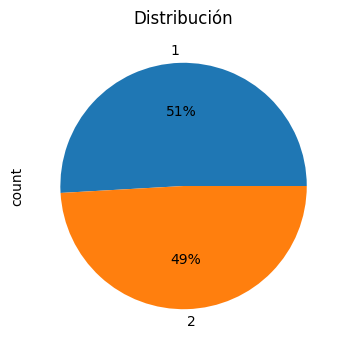

In [63]:
# Graficamos la distribución de la variable de entrada
# Vemos que el 51% NO son fumadores, mientras que el 49% si lo son.
data.SMOKING.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4), title = 'Distribución')

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

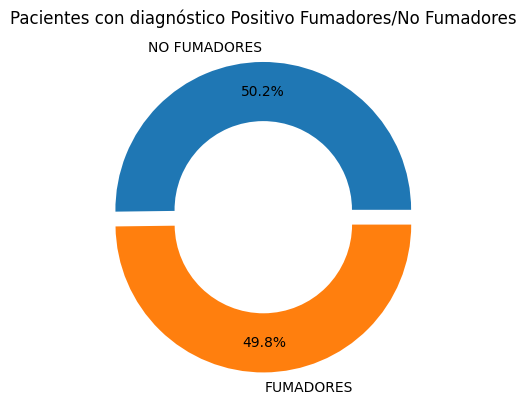

In [64]:
#¿Que Porcentaje de pacientes FUMADORES poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['SMOKING'].value_counts()
labels = []
for i in pie_data.index:
    if i == 1:
        labels.append('NO FUMADORES')
    else:
        labels.append('FUMADORES')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 50.2% de los pacientes son NO fumadores, mientras que el 49.8% SI lo son.

In [65]:
# Por lo que podemos observar el Dataset no tiene valores nulos.
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [66]:
#Ver si hay duplicados
#
#
#

<h2>3. Hipótesis sobre los datos.</h2>

<h3>a. Hipótesis sobre el Valor de la Variable "Target"</h3>

A partir del análisis exploratorio de datos, se pueden formular varias hipótesis para entender la relación entre la variable de diagnóstico de cáncer de pulmón (LUNG_CANCER) y las demás variables del conjunto de datos. A continuación, se presentan estas hipótesis detalladamente:

* **Influencia del Hábito de Fumar:** La hipótesis principal es que el hábito de fumar ejerce una influencia significativa en el diagnóstico de cáncer de pulmón. Aunque el análisis de correlación no muestra una relación extremadamente alta entre el hábito de fumar y el diagnóstico de cáncer, el hábito de fumar sigue siendo un factor de riesgo conocido y considerable. Los datos indican que el 49.8% de los pacientes diagnosticados con cáncer de pulmón son fumadores. Este porcentaje es comparable al de los no fumadores, sugiriendo que, aunque fumar es un factor relevante, no actúa como el único determinante del diagnóstico. Es posible que la influencia del hábito de fumar esté moderada por otros factores, como la edad o la presencia de síntomas.

* **Síntomas Asociados con el Cáncer:** Otra hipótesis es que la presencia de síntomas específicos, como tos (COUGHING) y dedos amarillos (YELLOW_FINGERS), está asociada con un mayor riesgo de cáncer de pulmón. Los datos muestran que aproximadamente el 52.7% de los pacientes con cáncer de pulmón reportan tos, y el 52.0% presentan dedos amarillos. Estos porcentajes son ligeramente superiores a los observados en la población general. Aunque estos síntomas podrían indicar la presencia de cáncer de pulmón, no son definitivos por sí mismos. La asociación entre estos síntomas y el diagnóstico sugiere que podrían ser indicadores importantes, pero deben ser considerados en conjunto con otras variables para una evaluación más precisa.

* **Edad como Factor de Riesgo:** La edad también podría ser un factor relevante en el diagnóstico de cáncer de pulmón. El análisis revela que los pacientes con cáncer de pulmón tienden a concentrarse en dos rangos etarios específicos: entre 32 y 46 años, y entre 70 y 81 años. Este hallazgo sugiere que tanto la juventud temprana como la edad avanzada están asociadas con una mayor incidencia de cáncer de pulmón. La influencia de la edad puede estar relacionada con la acumulación de factores de riesgo a lo largo del tiempo, así como con la predisposición genética o ambiental. La inclusión de la edad como una variable en el modelo podría mejorar la precisión del diagnóstico al capturar estas variaciones etarias.


<h3>b. Hallazgos Adicionales y su Impacto en la Creación de un Modelo</h3>

El análisis exploratorio de los datos del conjunto de pacientes diagnosticados con cáncer de pulmón ha revelado varios hallazgos adicionales que podrían influir significativamente en la construcción y precisión del modelo predictivo. Estos hallazgos son clave para mejorar la capacidad del modelo de identificar correctamente los casos de cáncer de pulmón y para determinar la importancia relativa de cada factor de riesgo. A continuación, se describen algunos de los principales hallazgos:

* **Balance de Clases en la Variable Objetivo:** El conjunto de datos está razonablemente balanceado en cuanto a la distribución de la variable objetivo (LUNG_CANCER). Aproximadamente la mitad de los pacientes del dataset han sido diagnosticados con cáncer de pulmón, mientras que la otra mitad no presenta este diagnóstico. Este equilibrio en las clases es un hallazgo positivo, ya que la ausencia de desbalance significativo evita el sesgo en los modelos supervisados. En un dataset altamente desbalanceado, un modelo podría sesgarse hacia la predicción de la clase mayoritaria, lo que llevaría a un bajo rendimiento en la identificación de casos menos comunes. Este balance asegura que el modelo pueda identificar tanto los pacientes con diagnóstico positivo como los negativos sin perder precisión.

* **Relación No Lineal entre Variables:** Aunque algunas variables, como el hábito de fumar y la presencia de síntomas, muestran una correlación con el diagnóstico de cáncer de pulmón, los análisis sugieren que estas relaciones no son lineales ni directas. Esto implica que factores adicionales podrían estar interactuando entre sí para influir en el diagnóstico. Por ejemplo, variables como la edad, el historial familiar y factores ambientales, aunque no tengan una correlación aislada alta, podrían tener un efecto combinado que sea más significativo. La incorporación de modelos que capturen interacciones no lineales, como árboles de decisión o redes neuronales, podría mejorar la capacidad de predicción.

* **Baja Variabilidad entre Pacientes Fumadores y No Fumadores:** A pesar de que el tabaquismo es un conocido factor de riesgo para el cáncer de pulmón, el análisis de este dataset muestra una diferencia relativamente pequeña entre fumadores y no fumadores. Esto podría indicar que el cáncer de pulmón en este conjunto de datos no depende exclusivamente de este hábito, o que hay otras variables, como predisposición genética o exposición a factores ambientales, que también juegan un papel crucial. Este hallazgo sugiere que el modelo debe ser diseñado para no sobrestimar la importancia del tabaquismo y prestar atención a otros factores para mejorar su rendimiento predictivo.

* **Rangos Etarios en la Distribución del Diagnóstico:** Un hallazgo relevante es la distribución del cáncer de pulmón en rangos de edad específicos, particularmente en pacientes jóvenes y de edad avanzada. Los pacientes diagnosticados se encuentran concentrados en dos grupos etarios: de 32 a 46 años y de 70 a 81 años. Este hallazgo sugiere que los modelos predictivos deben tener en cuenta la edad como un factor clave, posiblemente utilizando una función no lineal o categorizando la edad en intervalos, para reflejar mejor los patrones observados en los datos.


El impacto de estos hallazgos en la creación del modelo es significativo. En primer lugar, el balance en la variable objetivo permite utilizar modelos tradicionales de clasificación sin tener que aplicar técnicas para corregir el desbalance de clases. Sin embargo, debido a la naturaleza no lineal de las relaciones entre las variables, puede ser necesario considerar modelos avanzados como redes neuronales, máquinas de soporte vectorial o ensamblados de modelos (como Random Forest o Gradient Boosting) que capturen mejor las interacciones complejas.

Además, la presencia de multicolinealidad y de relaciones no evidentes entre variables como el tabaquismo y otros síntomas implica que es esencial un proceso de ingeniería de características (feature engineering) cuidadoso. Esto incluye la posible transformación de variables y la inclusión de interacciones entre variables para capturar mejor las relaciones subyacentes.

Finalmente, el uso de técnicas de validación cruzada y la inclusión de métricas de rendimiento robustas (como precisión, recall y F1-score) serán esenciales para evaluar adecuadamente el rendimiento del modelo y garantizar que no se sobreajuste a los patrones específicos del conjunto de datos actual.

<h3>c. Análisis sobre la Creación de Nuevas Variables</h3>

En el análisis de datos para el diagnóstico de cáncer de pulmón, la creación de variables derivadas a partir de los datos existentes puede aportar información adicional valiosa para mejorar la capacidad predictiva del modelo. A continuación, se exploran tres posibles variables derivadas y su impacto potencial en el modelo:



1. **Índice de riesgo respiratorio:** esta variable derivada combina los síntomas respiratorios podría proporcionar una visión más clara del riesgo general asociado a estos síntomas. Para ello, hemos creado una variable que suma la presencia de tos (COUGHING), dificultad para respirar (SHORTNESS_OF_BREATH) y silbido al respirar (WHEEZING). Esta variable tiene como objetivo identificar a los pacientes que presentan múltiples síntomas respiratorios, lo cual puede ser un indicador más fuerte de riesgo.

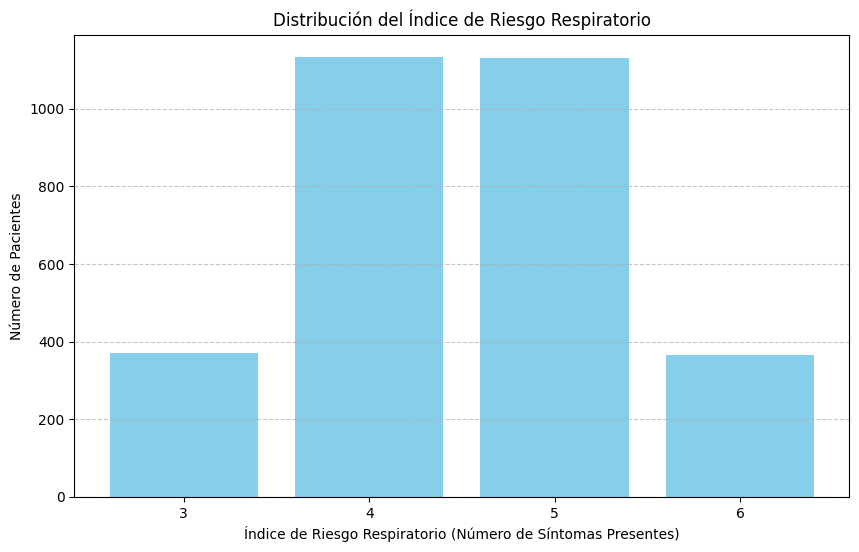

In [76]:
# Creamos la variable combinada para el índice de riesgo respiratorio
dataset['Respiratory_Risk'] = dataset[['COUGHING', 'SHORTNESS_OF_BREATH', 'WHEEZING']].sum(axis=1)

# Contar la frecuencia de cada nivel del índice de riesgo respiratorio
risk_counts = dataset['Respiratory_Risk'].value_counts().sort_index()

# Creamos un gráfico de barras para mostrar la distribución del índice de riesgo respiratorio
plt.figure(figsize=(10, 6))
plt.bar(risk_counts.index, risk_counts.values, color='skyblue')
plt.xlabel('Índice de Riesgo Respiratorio (Número de Síntomas Presentes)')
plt.ylabel('Número de Pacientes')
plt.title('Distribución del Índice de Riesgo Respiratorio')
plt.xticks(risk_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción del Gráfico:** El gráfico de barras muestra la distribución del índice de riesgo respiratorio, el cual representa el número de síntomas respiratorios presentes en cada paciente. El eje X indica el número total de síntomas respiratorios (de 0 a 3) y el eje Y muestra el número de pacientes que presentan cada nivel de síntomas. Este gráfico permite visualizar cómo varía la prevalencia de pacientes según el número de síntomas respiratorios.

2. **Riesgo Combinado de Tabaquismo y Síntomas Respiratorios:** La combinación del hábito de fumar con síntomas respiratorios puede proporcionar una visión más detallada del riesgo asociado al cáncer de pulmón. En este caso, creamos una variable que refleja la presencia de tabaquismo y la cantidad de síntomas respiratorios. Esta variable ayudará a identificar patrones en los pacientes que fuman y presentan síntomas respiratorios, proporcionando una medida combinada del riesgo.

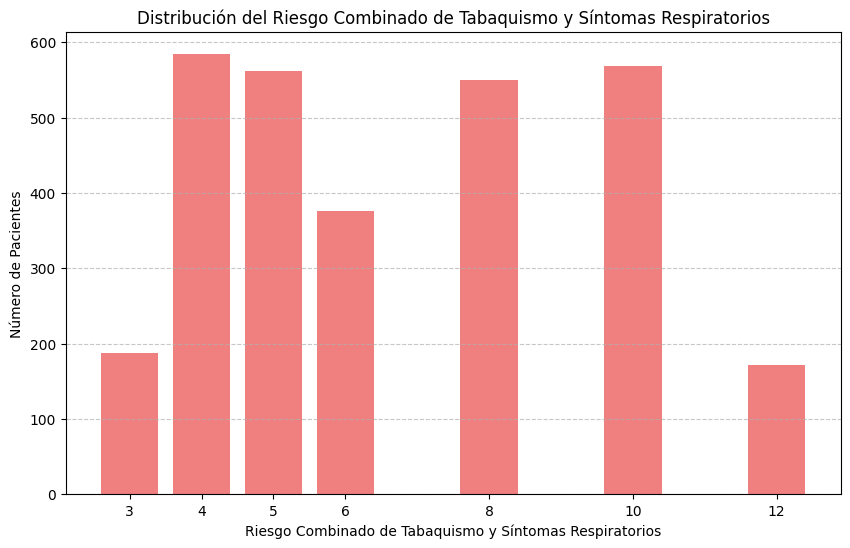

In [78]:
# Creamos una nueva variable para el riesgo combinado de tabaquismo y síntomas respiratorios
dataset['Smoking_Respiratory_Risk'] = dataset['SMOKING'] * dataset[['COUGHING', 'SHORTNESS_OF_BREATH', 'WHEEZING']].sum(axis=1)

# Contanos la frecuencia de cada nivel del riesgo combinado
combined_risk_counts = dataset['Smoking_Respiratory_Risk'].value_counts().sort_index()

# Creamos un gráfico de barras para mostrar la distribución del riesgo combinado
plt.figure(figsize=(10, 6))
plt.bar(combined_risk_counts.index, combined_risk_counts.values, color='lightcoral')
plt.xlabel('Riesgo Combinado de Tabaquismo y Síntomas Respiratorios')
plt.ylabel('Número de Pacientes')
plt.title('Distribución del Riesgo Combinado de Tabaquismo y Síntomas Respiratorios')
plt.xticks(combined_risk_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción del Gráfico:** El gráfico de barras muestra la distribución del riesgo combinado de tabaquismo y síntomas respiratorios. El eje X representa el nivel del riesgo combinado, donde un valor de 0 indica ausencia de tabaquismo o ausencia de síntomas respiratorios, y valores mayores indican la presencia de ambos factores. El eje Y muestra el número de pacientes que presentan cada nivel de riesgo combinado. Este gráfico proporciona una visión clara de cómo se distribuyen los pacientes en función de la combinación de tabaquismo y síntomas respiratorios.

3. **Comorbilidades:** La creación de una variable que refleje la presencia de múltiples comorbilidades puede ser útil para identificar pacientes con un riesgo elevado de cáncer de pulmón. Para este análisis, hemos combinado varias condiciones crónicas en una sola variable que refleja la cantidad de comorbilidades presentes en cada paciente. Esto permite evaluar si la presencia de múltiples condiciones crónicas está asociada con un mayor riesgo de cáncer de pulmón.

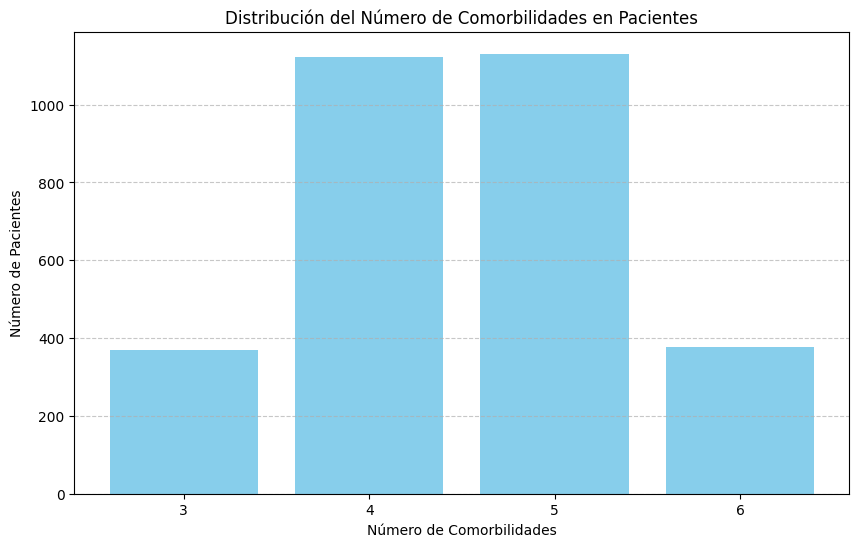

In [79]:
# Crear una nueva variable para el número total de comorbilidades
dataset['Comorbidities'] = dataset[['CHRONIC_DISEASE', 'ALLERGY', 'FATIGUE']].sum(axis=1)

# Contar la frecuencia de cada nivel de comorbilidades
comorbidity_counts = dataset['Comorbidities'].value_counts().sort_index()

# Crear un gráfico de barras para mostrar la distribución de las comorbilidades
plt.figure(figsize=(10, 6))
plt.bar(comorbidity_counts.index, comorbidity_counts.values, color='skyblue')
plt.xlabel('Número de Comorbilidades')
plt.ylabel('Número de Pacientes')
plt.title('Distribución del Número de Comorbilidades en Pacientes')
plt.xticks(comorbidity_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción del Gráfico:** El gráfico de barras ilustra la distribución del número de comorbilidades entre los pacientes. El eje X representa el número total de comorbilidades (es decir, la suma de condiciones crónicas como enfermedad crónica, alergia y fatiga), y el eje Y muestra la cantidad de pacientes que tienen cada nivel de comorbilidades. Este gráfico ayuda a identificar cómo la presencia de múltiples comorbilidades se distribuye entre los pacientes y puede indicar si los pacientes con un mayor número de comorbilidades tienen un riesgo elevado de cáncer de pulmón.